# df cluster


### loading libraries

In [1]:
import pandas as pd
import numpy as np

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

### loading csv files

In [26]:
df_price = pd.read_csv('../data/Cluster_data/df_price_cluster.csv')
df_sales = pd.read_csv('../data/Cluster_data/df_sales_cluster.csv')

### csv files exploration

In [27]:
df_price

,Unnamed: 0,item,price_min,price_max,price_mean
0,0,ACCESORIES_1_001,6.6500,12.7414,11.032755
1,1,ACCESORIES_1_002,2.6600,5.2801,5.275708
2,2,ACCESORIES_1_003,1.2502,7.9401,3.944125
3,3,ACCESORIES_1_004,5.0141,6.1712,5.983299
4,4,ACCESORIES_1_005,1.9950,4.0964,3.832119
...,...,...,...,...,...
3044,3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609
3045,3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692
3046,3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385
3047,3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790


In [29]:
del(df_price['Unnamed: 0'])

In [28]:
df_sales

,item,sales
0,ACCESORIES_1_001,4093
1,ACCESORIES_1_002,5059
2,ACCESORIES_1_003,1435
3,ACCESORIES_1_004,39175
4,ACCESORIES_1_005,14621
...,...,...
3044,SUPERMARKET_3_823,15388
3045,SUPERMARKET_3_824,8325
3046,SUPERMARKET_3_825,13526
3047,SUPERMARKET_3_826,12188


### merge df_sales and df_prices

In [7]:
df_cluster = pd.merge(df_price, df_sales, on=['item'], how='left')
df_cluster.head(1)

,item,price_min,price_max,price_mean,sales
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093


In [8]:
df_cluster

,item,price_min,price_max,price_mean,sales
0,ACCESORIES_1_001,6.6500,12.7414,11.032755,4093
1,ACCESORIES_1_002,2.6600,5.2801,5.275708,5059
2,ACCESORIES_1_003,1.2502,7.9401,3.944125,1435
3,ACCESORIES_1_004,5.0141,6.1712,5.983299,39175
4,ACCESORIES_1_005,1.9950,4.0964,3.832119,14621
...,...,...,...,...,...
3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609,15388
3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692,8325
3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385,13526
3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790,12188


In [ ]:
# price_max = precio max
# price_min = precio min
# price_mean = precio promedio
# number_sales = total de productos vendidos

### Create column "total_income" that represent the total income for product

In [10]:

df_cluster['total_income']= df_cluster['price_mean']*df_cluster['sales']
df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,total_income
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185


In [14]:
df_cluster["total_income"]=df_cluster["total_income"].round(2)

In [16]:
df_cluster

,item,price_min,price_max,price_mean,sales,total_income
0,ACCESORIES_1_001,6.6500,12.7414,11.032755,4093,45157.07
1,ACCESORIES_1_002,2.6600,5.2801,5.275708,5059,26689.81
2,ACCESORIES_1_003,1.2502,7.9401,3.944125,1435,5659.82
3,ACCESORIES_1_004,5.0141,6.1712,5.983299,39175,234395.74
4,ACCESORIES_1_005,1.9950,4.0964,3.832119,14621,56029.42
...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609,15388,51466.84
3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692,8325,25197.21
3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385,13526,66742.50
3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790,12188,18718.21


In [7]:
df_cluster.describe().T

NameError: name 'df_cluster' is not defined

### draw scatter plot

In [8]:
sns.scatterplot(data= df_cluster , x='sales', y='total_income')

NameError: name 'df_cluster' is not defined

In [9]:
df_cluster1 = df_cluster.copy()

NameError: name 'df_cluster' is not defined

### drop unnecessary columns

In [10]:
df_cluster1.drop(columns=['item','price_min','sales'], axis=1,inplace=True)

NameError: name 'df_cluster1' is not defined

In [11]:
df_cluster1.head(1)

NameError: name 'df_cluster1' is not defined

## clustering

### scale my variables

In [12]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_cluster_scaled = scaaler.fit_transform(df_cluster1)

NameError: name 'df_cluster1' is not defined

In [13]:
df_cluster_scaled.head()

NameError: name 'df_cluster_scaled' is not defined

### use PCA so to reduce dimensionality, overfitting and noise

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(df_cluster_scaled)
pca_data_scaled = pca.transform(df_cluster_scaled)
pca_data_scaled

NameError: name 'df_cluster_scaled' is not defined

In [16]:
var = pca.explained_variance_ratio_
print(var)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [17]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

NameError: name 'var' is not defined

### visual test and evaluation


In [18]:
sum_of_squared_distances = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_cluster1)
    sum_of_squared_distances.append(km.inertia_)

NameError: name 'df_cluster1' is not defined

ValueError: x and y must have same first dimension, but have shapes (13,) and (0,)

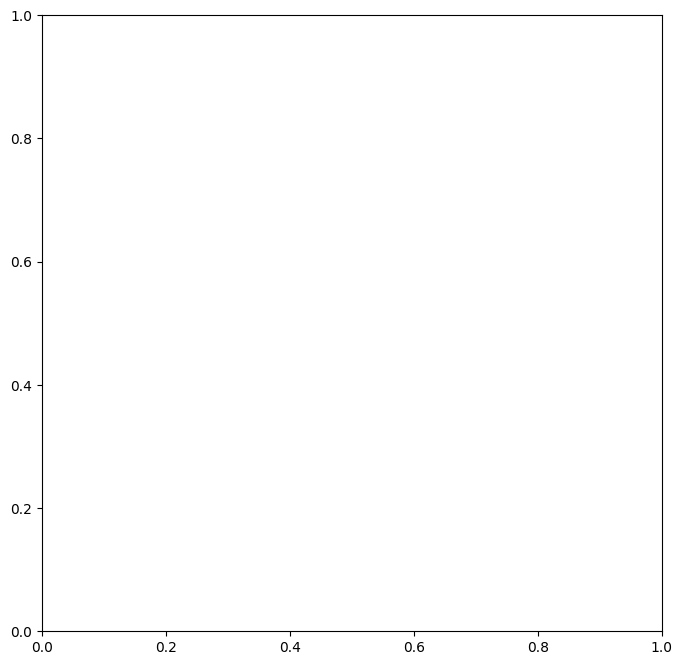

In [19]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

### Use Kmean for identify "the elbow"

In [40]:

km = KMeans(n_clusters = 4,  random_state=42)
y = km.fit_predict(df_cluster1)

df_cluster['k_means'] = y

In [41]:

df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,total_income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.07,0
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.81,0


In [47]:
df_cluster1

,price_max,price_mean,total_income
0,12.7414,11.032755,45157.07
1,5.2801,5.275708,26689.81
2,7.9401,3.944125,5659.82
3,6.1712,5.983299,234395.74
4,4.0964,3.832119,56029.42
...,...,...,...
3044,3.5760,3.344609,51466.84
3045,3.2160,3.026692,25197.21
3046,5.2560,4.934385,66742.50
3047,1.5360,1.535790,18718.21


# merge both df_cluster and df_clusteizado con originalso to plot the clusters

In [48]:

df_clusterizado = df_cluster.merge(df_cluster1, on =['price_max','price_mean','total_income'], how='left')
df_clusterizado.head(2)

,item,price_min,price_max,price_mean,sales,total_income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.07,0
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.81,0


<function matplotlib.pyplot.show(close=None, block=None)>

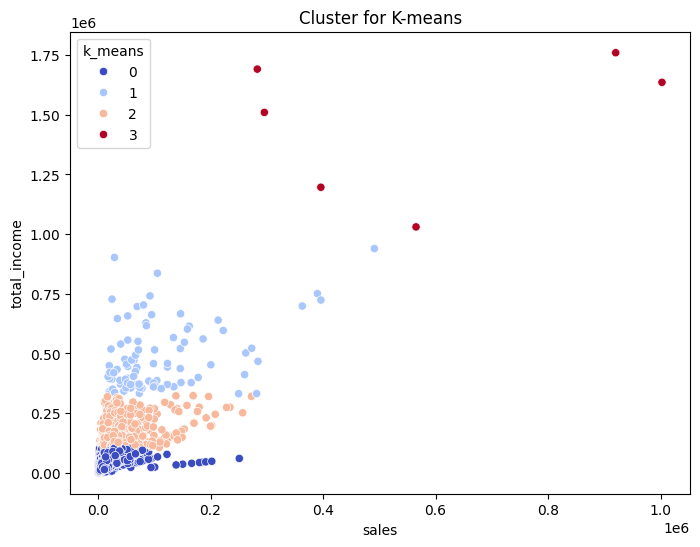

In [54]:
plt.figure(figsize=(8,6))
plt.title('Cluster for K-means')
sns.scatterplot(data=df_cluster, x='sales', y='total_income', hue='k_means',palette='coolwarm')
plt.show

In [79]:
df_cluster.sample(1)

,item,category,price_min,price_max,price_mean,sales,total_income,k_means
1127,HOME_&_GARDEN_2_031,HOME_&_GARDEN,7.425,7.425,7.425,3713,27569.02,0


In [56]:
df_cluster["category"] = df_cluster["item"].apply(lambda x: x[:-6])

In [20]:
del(df_cluster['percentage'])

NameError: name 'df_cluster' is not defined

In [21]:
columns = ["item", "category", "price_min", "price_max", "price_mean", "sales", "total_income","k_means", ]

In [22]:
df_cluster = df_cluster[columns]

NameError: name 'df_cluster' is not defined

In [23]:
df_cluster.sample(1)

NameError: name 'df_cluster' is not defined

In [24]:
# file_name = "df_cluster.csv"
# df_cluster.to_csv(file_name)